In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# функции read_gff и read_bed6 для чтения соответствующих форматов

def read_gff(file):
    col = ['chromosome', 'source', 'type', 'start', 'end', 'score', 'stand', 'phase', 'attributes']
    return pd.read_csv(file, comment='"', header=None, names=col, sep = '\s+').drop(index=0)

def read_bed6(file):
    col = ['chromosome', 'start', 'end', 'name', 'score', 'stand']
    return pd.read_csv(file, comment='"', header=None, names=col, sep = '\s+').drop(index=0)

In [16]:
df_gff = read_gff('rrna_annotation.gff')
df_bed6 = read_bed6('alignment.bed')

In [8]:
df_gff.head()

,chromosome,source,type,start,end,score,stand,phase,attributes
1,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S
2,Reference_10,barrnap:0.9,rRNA,68981.0,72061.0,0.0,+,.,Name=23S_rRNA;product=23S
3,Reference_10,barrnap:0.9,rRNA,469298.0,470826.0,0.0,+,.,Name=16S_rRNA;product=16S
4,Reference_10,barrnap:0.9,rRNA,471166.0,474246.0,0.0,+,.,Name=23S_rRNA;product=23S
5,Reference_10,barrnap:0.9,rRNA,3629599.0,3632680.0,0.0,-,.,Name=23S_rRNA;product=23S


In [9]:
df_bed6.head()

,chromosome,start,end,name,score,stand
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
5,Reference_1,1763926,1764363,NODE_5666_length_436_cov_418.653543,0,-


In [17]:
# сокращение колонки атрибутов

new_df_gff = df_gff.copy()
df_gff['attributes'] = df_gff['attributes'].apply(lambda x: x.split('=')[-1])
df_gff.head()

,chromosome,source,type,start,end,score,stand,phase,attributes
1,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,16S
2,Reference_10,barrnap:0.9,rRNA,68981.0,72061.0,0.0,+,.,23S
3,Reference_10,barrnap:0.9,rRNA,469298.0,470826.0,0.0,+,.,16S
4,Reference_10,barrnap:0.9,rRNA,471166.0,474246.0,0.0,+,.,23S
5,Reference_10,barrnap:0.9,rRNA,3629599.0,3632680.0,0.0,-,.,23S


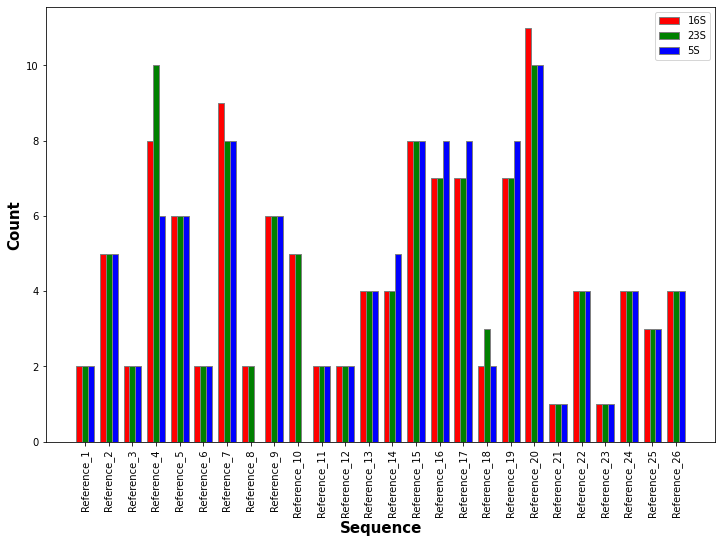

In [19]:
# BarPlot количество рРНК каждого типа

chromo = [x[1] for x in sorted([[int(x.split('_')[-1]), x] for x in df_gff['chromosome'].unique()])]
barplot = [[], [], []]

for chr in chromo:
    barplot[0].append(len(df_gff[(df_gff['chromosome'] == chr) & (df_gff['attributes']=='16S')]))
    barplot[1].append(len(df_gff[(df_gff['chromosome'] == chr) & (df_gff['attributes']=='23S')]))
    barplot[2].append(len(df_gff[(df_gff['chromosome'] == chr) & (df_gff['attributes']=='5S')]))


barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(barplot[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, barplot[0], color ='r', width = barWidth, edgecolor ='grey', label ='16S')
plt.bar(br2, barplot[1], color ='g', width = barWidth, edgecolor ='grey', label ='23S')
plt.bar(br3, barplot[2], color ='b', width = barWidth, edgecolor ='grey', label ='5S')
 
plt.xlabel('Sequence', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(chromo))], chromo, rotation = 90)
 
plt.legend()
plt.show()

In [20]:
# рРНК полностью вошедшие в сборку 

df = new_df_gff.merge(df_bed6, left_on=['chromosome'], right_on=['chromosome'], how='inner')

df.head()

,chromosome,source,type,start_x,end_x,score_x,stand_x,phase,attributes,start_y,end_y,name,score_y,stand_y
0,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.0,+,.,Name=16S_rRNA;product=16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
